# Project X: Covid-19 Diagnosis from Chest X-Ray

The aim of this notebook is to create a convolutional neural network to predict whether a chest x-ray image is from a patient with or without covid-19. the dataset comes from https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database and uses only the x-rays from the normal and covid-19 classes.

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import glob
import matplotlib.image as mpimg
import os
import PIL
import PIL.Image
import tensorflow as tf

## Data Preparation

The first step is to read the data from the local drive to be used in the training and validation datasets.

In [7]:
# Set up some default values for reading and splitting the images into test and train
batch_size = 32
img_height = 200
img_width = 200
seed = 42
data_dir = './big_dataset/'

In [8]:
# Read in the data for the test dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    # Assign 20% of the data for the validation set
    validation_split = 0.2,
    # Specify that train_ds is the training set and therefore contatins 80% of the images
    subset = 'training',
    seed = seed,
    image_size = (img_height, img_width),
    batch_size =  batch_size)

Found 13808 files belonging to 2 classes.
Using 11047 files for training.


In [9]:
# Read in the data for the validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    # Assign 20% of the data for the validation set
    validation_split = 0.2,
    # Specify that val_ds is the validation set and therefore contains 20% of the images
    subset = 'validation',
    seed = seed,
    image_size = (img_height, img_width),
    batch_size =  batch_size)

Found 13808 files belonging to 2 classes.
Using 2761 files for validation.


In [10]:
# Check to see that the two classes have imported correctly
class_names = train_ds.class_names
print(class_names)

['covid', 'normal']


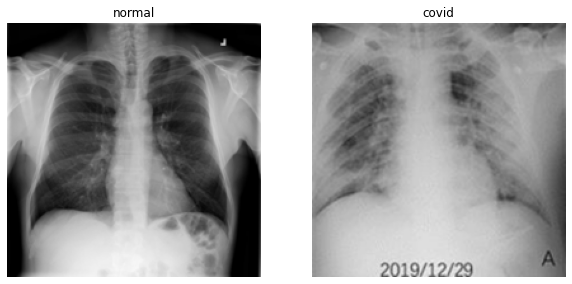

In [47]:
# Visualise one image from each class
plt.figure(figsize = (10,5))
for images, labels in train_ds.take(1):
    for i in range(2):
        ax = plt.subplot(1,2,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

Now that the data has been read in, it is possible to build and train a model on the image datasets

## Model Building and Training

In [12]:
# Import libraries for CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [37]:
# Define the network. The layers are as follows:
    # Conv2D: a 2 Dimensional convolution layer
    # MaxPooling2D: a layer that downsamples the input in a grid (size = pool_size) by taking the maximum value of that pool
    # Flatten: Reduce the dimensionality of the input to 1 dimension
    # Dense: a network layer that adds weights usisng the activation function and biases to fit the data
    # Dropout: A layer that randomly sets inputs to 0 at a frequency specified to prevent overfitting

model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)),
    MaxPooling2D(pool_size=(3,3)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(3,3)),
    Flatten(),
    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

In [38]:
# Compile the cnn model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 66, 66, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 21, 21, 32)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 14112)             0         
                                                                 
 dense_16 (Dense)            (None, 64)               

In [39]:
# Fit the model to the training dataset
history = model.fit(train_ds, epochs = 20, validation_data = val_ds)

Epoch 1/20
346/346 [==============================] - 164s 471ms/step - loss: 2.3116 - accuracy: 0.7944 - val_loss: 0.3521 - val_accuracy: 0.8251
Epoch 2/20
346/346 [==============================] - 169s 487ms/step - loss: 0.3390 - accuracy: 0.8408 - val_loss: 0.3178 - val_accuracy: 0.8428
Epoch 3/20
346/346 [==============================] - 178s 514ms/step - loss: 0.3371 - accuracy: 0.8451 - val_loss: 0.3099 - val_accuracy: 0.8569
Epoch 4/20
346/346 [==============================] - 172s 496ms/step - loss: 0.2836 - accuracy: 0.8741 - val_loss: 0.3002 - val_accuracy: 0.8602
Epoch 5/20
346/346 [==============================] - 165s 475ms/step - loss: 0.2579 - accuracy: 0.8888 - val_loss: 0.2735 - val_accuracy: 0.8805
Epoch 6/20
346/346 [==============================] - 189s 546ms/step - loss: 0.2180 - accuracy: 0.9073 - val_loss: 0.2487 - val_accuracy: 0.8957
Epoch 7/20
346/346 [==============================] - 191s 552ms/step - loss: 0.1837 - accuracy: 0.9227 - val_loss: 0.2276 -

## Evaluation of Model Performance

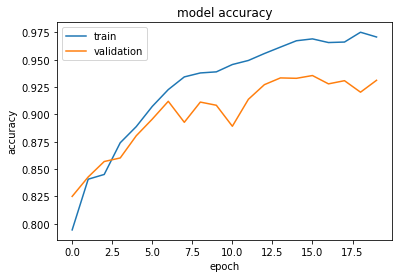

In [40]:
# Visualise the model training
# Accuracy:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

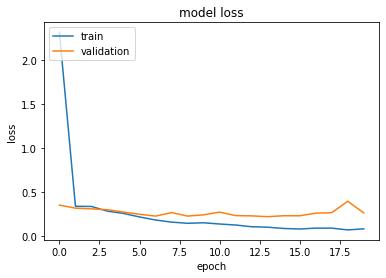

In [41]:
# Loss:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [42]:
test_loss, test_acc = model.evaluate(val_ds, verbose=2)

87/87 - 11s - loss: 0.2632 - accuracy: 0.9312 - 11s/epoch - 128ms/step


In [45]:
print(f'Final Model Accuracy: {round(test_acc*100, 2)}%')

Final Model Accuracy: 93.12%


It can be seen that the overall model performance is good with a 93% accuracy on data that it has never seen before. The training performance is good with a broad increase in accuracy as the training progressed coupled with a decrease in loss. Moving forward, it would be good to add images of other respiratory diseases such as pneumonia too make the classification more difficult. This could be done with some modification to the output layer of the network and the loss function used to train the network as it is currently only suitable for binary classification.

In [57]:
# Save the training losses and accuracies to csv
training = pd.DataFrame(data = history.history)
epochs = np.arange(1,21)
training['epoch'] = epochs
training.to_csv('cnn_training.csv')